# CONVOLUTIONAL NEURAL NETWORK

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle Competition/Digit Recognizer/train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
X=df.drop('label',axis=1)
y=df['label']

In [8]:
X.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_x=[]
for i in range(42000):
  temp=X.loc[i,:]
  train_x.append(list(temp))


In [10]:
train_images=np.divide(train_x, 255.0)

In [11]:
x_train=list(train_images)

In [12]:
train_images=train_images.reshape(len(train_images),28,28,1)

In [13]:
train_images[0].shape

(28, 28, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout,MaxPooling2D,BatchNormalization
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

## HYPERPARAMETER TUNING

In [15]:
def build_model(hp):
  model=Sequential()
  model.add(layers.Conv2D(
          filters=hp.Int('conv_1_input', min_value =32, max_value=128, step=16), 
          kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),padding='same',
          input_shape=(28,28,1)))
  
  model.add(layers.Conv2D(
          filters=hp.Int('conv_layer_', min_value=32, max_value=64, step=16), 
          kernel_size=hp.Choice('conv_kernel_', values = [3,5]), 
          activation='relu',padding='same'))

  model.add(layers.Flatten())
  model.add(layers.Dense(
          units=hp.Int('dense_1', min_value=32, max_value=128, step=16), 
          activation='relu'))

  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [16]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='digit recognizer')

In [17]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
min_delta= 0.0001,
monitor="val_loss", 
patience=20, 
mode="auto",
verbose=1,
baseline=None, 
restore_best_weights=False)

In [18]:
tuner.search(train_images,y,epochs=5,validation_split=0.33)

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.9800879955291748

Best val_accuracy So Far: 0.9826130867004395
Total elapsed time: 00h 02m 43s


In [19]:
tuner.results_summary()

Results summary
Results in project/digit recognizer
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_input: 48
conv_1_kernel: 5
conv_layer_: 32
conv_kernel_: 5
dense_1: 96
learning_rate: 0.001
Score: 0.9826130867004395
Trial summary
Hyperparameters:
conv_1_input: 96
conv_1_kernel: 5
conv_layer_: 48
conv_kernel_: 5
dense_1: 48
learning_rate: 0.001
Score: 0.9800879955291748
Trial summary
Hyperparameters:
conv_1_input: 80
conv_1_kernel: 3
conv_layer_: 48
conv_kernel_: 3
dense_1: 112
learning_rate: 0.01
Score: 0.9443762898445129
Trial summary
Hyperparameters:
conv_1_input: 128
conv_1_kernel: 3
conv_layer_: 48
conv_kernel_: 3
dense_1: 64
learning_rate: 0.01
Score: 0.9438713192939758
Trial summary
Hyperparameters:
conv_1_input: 112
conv_1_kernel: 3
conv_layer_: 32
conv_kernel_: 3
dense_1: 32
learning_rate: 0.01
Score: 0.9349253177642822


## MODEL TRAINING

In [25]:
model=Sequential()

In [26]:
model.add(layers.Conv2D(filters=32,kernel_size=5,padding='same',input_shape=(28,28,1)))

In [27]:
model.add(layers.Conv2D(filters=48,kernel_size=5,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

In [28]:
model.add(layers.Flatten())

In [29]:
dense=[96]
for i in range(len(dense)):
  model.add(layers.Dense(units=dense[i],kernel_initializer='he_uniform',activation='relu'))
  model.add(Dropout(0.3))

In [30]:
model.add(layers.Dense(10, activation='softmax')) 

In [31]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
min_delta= 0.0001,
monitor="val_loss", 
patience=20, 
mode="auto",
verbose=1,
baseline=None, 
restore_best_weights=False)

In [33]:
digit_model=model.fit(train_images,y,validation_split=0.1,epochs=10)

Epoch 1/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1740 - accuracy: 0.9462 - val_loss: 0.0578 - val_accuracy: 0.9790
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0710 - accuracy: 0.9785 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0460 - val_accuracy: 0.9888
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0525 - val_accuracy:

## PERFORMANCE OF THE MODEL

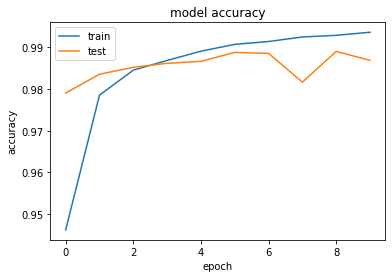

In [34]:
plt.plot(digit_model.history['accuracy'])
plt.plot(digit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
##test data

In [36]:
df_test=pd.read_csv('/content/drive/MyDrive/Kaggle Competition/Digit Recognizer/test.csv')

In [37]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.shape

(28000, 784)

In [39]:
test_x=[]
for i in range(28000):
  temp1=df_test.loc[i,:]
  test_x.append(list(temp1))

In [40]:
test_images=np.divide(test_x, 255.0)

In [41]:
x_test=list(test_images)

In [42]:
len(test_images)

28000

In [43]:
test_images=test_images.reshape(len(test_images),28,28,1)

In [44]:
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## PREDICTION

In [45]:
y_pred = model.predict(test_images)

In [46]:
y_pred[0]

array([4.5743890e-12, 7.4907396e-16, 1.0000000e+00, 9.1969169e-15,
       4.9789560e-16, 8.7067664e-23, 1.6066640e-21, 7.6234642e-15,
       6.3453880e-16, 9.9502231e-17], dtype=float32)

In [47]:
pred = tf.math.argmax(y_pred, axis = -1)
print(pred.shape)
pred = pd.Series(pred, name='Label')
pred.head()

image_id = pd.Series(range(1,28001),name='ImageId')
image_id.isnull().sum()
image_id.shape

pred = pd.concat([image_id,pred],axis=1)
pred.head()

(28000,)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
